# Final assignment 

## Step 1: Importing necessary libraries and dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('modified_heart_dataset_supervised.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


## Step 2: Data manipulation and preparation

Firstly, I got rid of columns 'GeneticMarker1' and 'GeneticMarker2' as they are not relevant

In [4]:
df=df.drop(columns=['GeneticMarker1', 'GeneticMarker2'])

Afterwards, I made sure there were no null or duplicated values

In [5]:
#check for null values
df.isnull().any()

Age                   False
Sex                   False
ChestPainType         False
RestingBP             False
Cholesterol           False
FastingBS             False
RestingECG            False
MaxHR                 False
ExerciseAngina        False
Oldpeak               False
ST_Slope              False
BodyWeightCategory    False
HeartDisease          False
dtype: bool

In [6]:
#check for duplicate values
duplicate_values=df[df.duplicated()]
duplicate_values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,BodyWeightCategory,HeartDisease


As there were no duplicates or null values to drop, I checked for outliers

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.239651,198.787582,0.233115,136.643791,0.887364,0.553377
std,9.432617,18.804257,109.529397,0.423046,25.662700,1.066570,0.497414
min,28.000000,1.000000,-5.000000,0.000000,56.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,131.000000,223.000000,0.000000,137.000000,0.600000,1.000000
75%,60.000000,143.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,201.000000,607.000000,1.000000,201.000000,6.200000,1.000000


Columns 'Cholesterol' and 'Oldpeak' most likely contain outliers, I double checked via boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x13192b450>,
 'caps': [<matplotlib.lines.Line2D at 0x131934dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13170e5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x131936450>],
 'fliers': [<matplotlib.lines.Line2D at 0x131936f10>],
 'means': []}

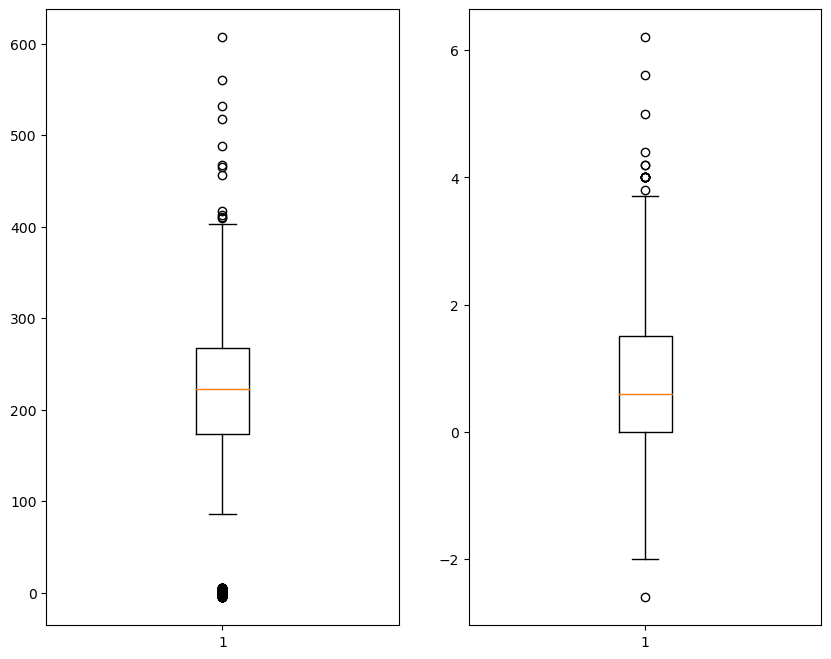

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

ax[0].boxplot(df['Cholesterol'])
ax[1].boxplot(df['Oldpeak'])

It is now clear that both columns contain outliers, so I used the IQR formula to identify them and remove them

In [9]:
# calculate IQR for column Oldpeak
op_Q1 = df['Oldpeak'].quantile(0.25)
op_Q3 = df['Oldpeak'].quantile(0.75)
op_IQR = op_Q3 - op_Q1

# identify outliers
op_outliers = df[(df['Oldpeak'] < op_Q1 - 1.5 * op_IQR) | (df['Oldpeak'] > op_Q3 + 1.5 * op_IQR)]

#drop outliers
df=df.drop(op_outliers.index)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,53.443459,132.063193,197.968958,0.233925,136.688470,0.833481,0.546563
std,9.436899,18.645576,109.778463,0.423560,25.731376,0.965986,0.498103
min,28.000000,1.000000,-5.000000,0.000000,56.000000,-2.000000,0.000000
25%,47.000000,120.000000,171.250000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,131.000000,222.000000,0.000000,137.000000,0.500000,1.000000
75%,60.000000,143.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,201.000000,607.000000,1.000000,201.000000,3.700000,1.000000


In [10]:
# calculate IQR for column Cholesterol
chol_Q1 = df['Cholesterol'].quantile(0.25)
chol_Q3 = df['Cholesterol'].quantile(0.75)
chol_IQR = chol_Q3 - chol_Q1

# identify outliers
chol_outliers = df[(df['Cholesterol'] < chol_Q1 - 1.5 * chol_IQR) | (df['Cholesterol'] > chol_Q3 + 1.5 * chol_IQR)]

#drop outliers
df=df.drop(chol_outliers.index)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,52.795833,132.701389,240.623611,0.165278,140.302778,0.833194,0.466667
std,9.492621,17.462808,51.290942,0.371689,24.732280,0.959845,0.499234
min,28.000000,89.000000,86.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,121.000000,207.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,131.000000,236.000000,0.000000,141.000000,0.400000,0.000000
75%,59.000000,143.000000,274.250000,0.000000,159.000000,1.500000,1.000000
max,77.000000,195.000000,403.000000,1.000000,201.000000,3.600000,1.000000


## Step 3: Data Visualization

Exploring the relations between HeartDesease and a few demographic variables (age, sex, and body weight category)

Text(0.5, 1.0, 'Distribution of Heart Disease by Body Weight Category')

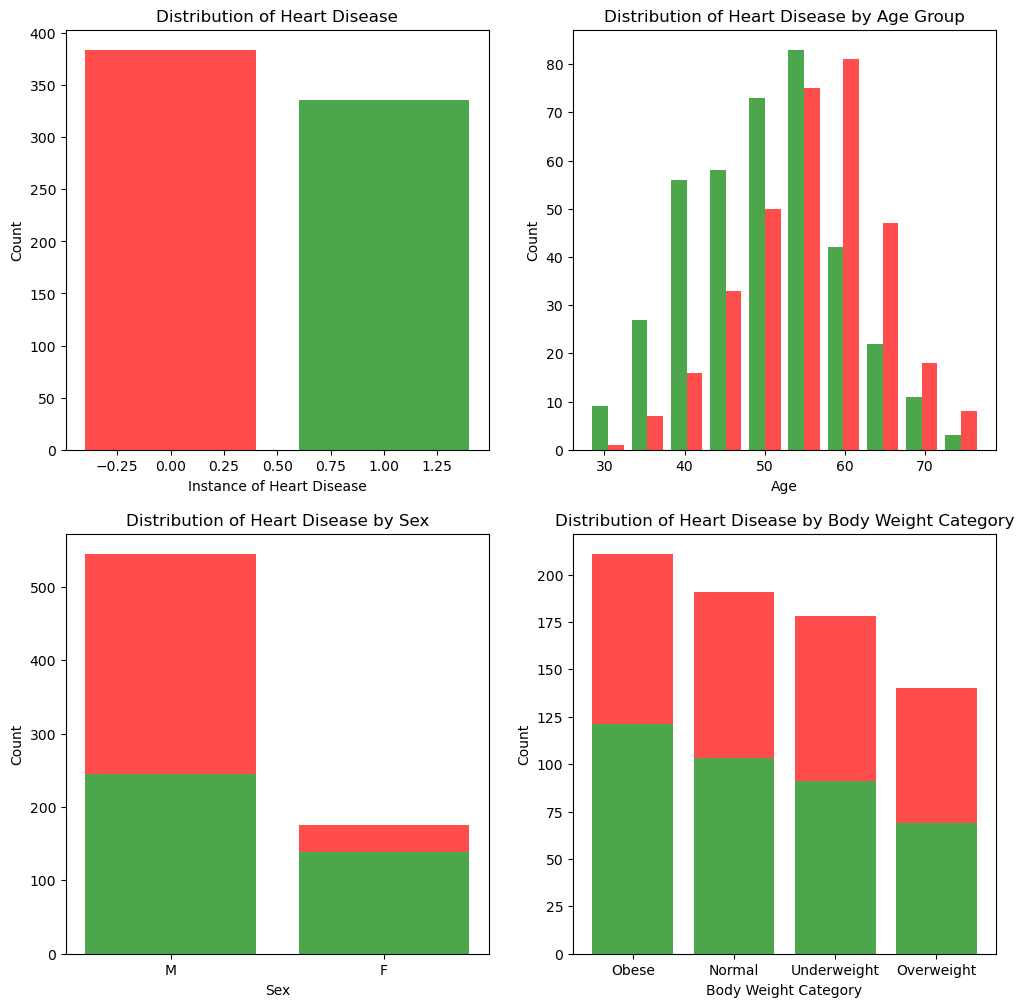

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

hd_counts = df['HeartDisease'].value_counts()
ax[0,0].bar(hd_counts.index, hd_counts, color=['red', 'green'], alpha=0.7)
ax[0,0].set_xlabel('Instance of Heart Disease')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Distribution of Heart Disease')


no_hd_age=df[df['HeartDisease']==0]['Age']
yes_hd_age=df[df['HeartDisease']==1]['Age']
ax[0,1].hist([no_hd_age, yes_hd_age], bins=10, color=['green','red'], alpha=0.7, label=['Normal', 'Heart Disease'])
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Distribution of Heart Disease by Age Group')

sex_counts=df['Sex'].value_counts()
no_hd_sex=df[df['HeartDisease']==0]['Sex'].value_counts()
yes_hd_sex=df[df['HeartDisease']==1]['Sex'].value_counts()
ax[1,0].bar(sex_counts.index, no_hd_sex, color='green', alpha=0.7, label='Normal')
ax[1,0].bar(sex_counts.index, yes_hd_sex, bottom=no_hd_sex, color='red', alpha=0.7, label='Heart Disease')
ax[1,0].set_xlabel('Sex')
ax[1,0].set_ylabel('Count')
ax[1,0].set_title('Distribution of Heart Disease by Sex')

bwc_counts=df['BodyWeightCategory'].value_counts()
no_hd_bwc=df[df['HeartDisease']==0]['BodyWeightCategory'].value_counts()
yes_hd_bwc=df[df['HeartDisease']==1]['BodyWeightCategory'].value_counts()
ax[1,1].bar(bwc_counts.index, no_hd_bwc, color='green', alpha=0.7, label='Normal')
ax[1,1].bar(bwc_counts.index, yes_hd_bwc, bottom=no_hd_bwc, color='red', alpha=0.7, label='Heart Disease')
ax[1,1].set_xlabel('Body Weight Category')
ax[1,1].set_ylabel('Count')
ax[1,1].set_title('Distribution of Heart Disease by Body Weight Category')

As visible from the graph, there is a correlation between distribution of heart disease and age, as well as sex. However the distribution of heart disease seems to not be affected by body weight category, therefore I decided to drop the column

In [12]:
df=df.drop(columns=['BodyWeightCategory'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,1


## Step 4: Encoding

In [13]:
#Linear encoding
df['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,0,0.0,Up,0
1,49,F,NAP,158,175,0,Normal,151,0,1.0,Flat,1
2,37,M,ATA,135,285,0,ST,97,0,0.0,Up,0
3,48,F,ASY,140,214,0,Normal,112,1,1.5,Flat,1
4,54,M,NAP,149,192,0,Normal,124,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,0,1.2,Flat,1
914,68,M,ASY,142,190,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,135,128,0,Normal,118,1,1.2,Flat,1
916,57,F,ATA,128,236,0,LVH,172,0,0.0,Flat,1


In [14]:
#Dummy encoding
df=pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], dtype=int)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,141,289,0,173,0,0.0,0,0,1,0,1,0,0,0,1,0,0,0,1
1,49,158,175,0,151,0,1.0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,37,135,285,0,97,0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,48,140,214,0,112,1,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0
4,54,149,192,0,124,0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,106,268,0,135,0,1.2,1,0,1,0,0,0,1,0,1,0,0,1,0
914,68,142,190,1,141,0,3.4,1,0,1,1,0,0,0,0,1,0,0,1,0
915,57,135,128,0,118,1,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0
916,57,128,236,0,172,0,0.0,1,1,0,0,1,0,0,1,0,0,0,1,0


## Step 5: Model Training and Testing

In [15]:
# Import necessary libraries for model training.


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

# Split the dataset into features (x) and target variable (y).
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Due to the nature of the dataset, I decided to test for both accuracy and recall, as we want to minimize the chance of false positives

In [33]:
# Train a Logistic Regression model
model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train, y_train)

# Make predictions

predictions_lr = model_lr.predict(X_test)

In [34]:
# Evaluate the performance of the model using accuracy, recall

accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f'Accuracy: {accuracy_lr}')
recall_lr = recall_score(y_test, predictions_lr)
print(f'Recall: {recall_lr}')

Accuracy: 0.8541666666666666
Recall: 0.8461538461538461


In [20]:
# Train a Decision Tree model

model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


# Make predictions

predictions_dt=model_dt.predict(X_test)

In [21]:
# Evaluate the performance of the model using accuracy, recall

accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f'Accuracy: {accuracy_dt}')
recall_dt = recall_score(y_test, predictions_dt)
print(f'Recall: {recall_dt}')

Accuracy: 0.7986111111111112
Recall: 0.7564102564102564


In [23]:
# Train a SVM model

model_svm = SVC()
model_svm.fit(X_train, y_train)


# Make predictions

predictions_svm=model_svm.predict(X_test)

In [24]:
# Evaluate the performance of the model using accuracy

accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f'Accuracy: {accuracy_svm}')
recall_svm = recall_score(y_test, predictions_svm)
print(f'Recall: {recall_svm}')

Accuracy: 0.7430555555555556
Recall: 0.5641025641025641


From the evaluat